In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()
X, y = raw_data.data, raw_data.target

print(f"Any nans? {np.isnan(X).any()}")

X.shape, y.shape

Any nans? False


((569, 30), (569,))

### Train / TEST / Split

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler(
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


### MLP Network

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name = "Input_Layer"))
    model.add(Dense(32, name = "Hidden1", activation = "relu")) #change to he initalizer
    model.add(Dense(32, name = "Hidden2", activation = "relu"))
    model.add(Dense(1, name = "Output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer= "adam")
    return model

model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(scaled_X_train, y_train, epochs=500, validation_split=.2, verbose=1)

Epoch 1/500
10/10 [==============================] - 1s 16ms/step - loss: 0.7346 - val_loss: 0.6350
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5688 - val_loss: 0.5062
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4486 - val_loss: 0.4047
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3516 - val_loss: 0.3172
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2705 - val_loss: 0.2448
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2079 - val_loss: 0.1952
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1673 - val_loss: 0.1609
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1389 - val_loss: 0.1391
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1184 - val_loss: 0.1247
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1040 - val_loss: 0.1146
Epoch 11

In [36]:
import pandas as pd
df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.734628,0.634994
1,0.568761,0.506192
2,0.448605,0.404693
3,0.351568,0.317163
4,0.270538,0.244818


<AxesSubplot:>

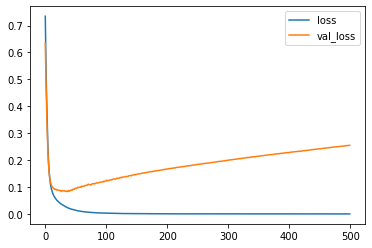

In [37]:
df_loss.plot()
#clear overfitting as validation loss increases after a certain amount of epochs

In [38]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(scaled_X_train, y_train, epochs=50, validation_split=.2, verbose=1)

Epoch 1/50
10/10 [==============================] - 0s 12ms/step - loss: 0.6830 - val_loss: 0.6064
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5157 - val_loss: 0.4476
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3936 - val_loss: 0.3342
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3015 - val_loss: 0.2617
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2359 - val_loss: 0.2139
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1902 - val_loss: 0.1819
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1592 - val_loss: 0.1605
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1356 - val_loss: 0.1456
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1206 - val_loss: 0.1336
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1079 - val_loss: 0.1245
Epoch 11/50
10/10 

<AxesSubplot:>

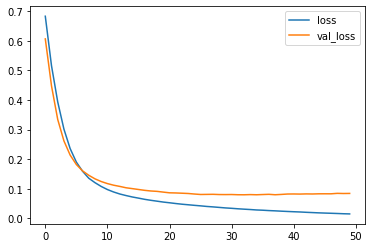

In [40]:
pd.DataFrame(model.history.history).plot()

In [41]:
model = MLP()
model.fit(scaled_X_train, y_train, epochs = 50, verbose=0)

## Prediction and evaluation

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



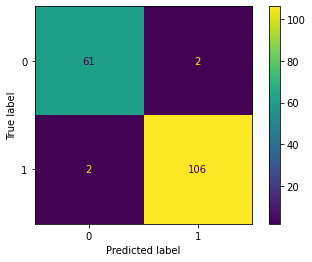

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
np.round(y_pred)

y_pred = (y_pred > .5)*1

cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))